In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics
import random
from random import randint
import time
import os
import numpy as np
from collections import namedtuple
import cv2
from pathlib import Path
import argparse
import os
import csv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras

from imblearn.over_sampling import SMOTE

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/drive/MyDrive/

!unzip -qq "/content/drive/MyDrive/data.zip"

/content/drive/MyDrive


In [ ]:
folder_path_1 = "/content/drive/MyDrive/이상(방화)"
folder_path_2 = "/content/drive/MyDrive/이상(유기)"
folder_path_3 = "/content/drive/MyDrive/이상(전도)"
folder_path_4 = "/content/drive/MyDrive/이상(절도)"
#folder_path_4 = "/content/drive/MyDrive/가방"
folder_path_5 = "/content/drive/MyDrive/이상(파손)"
folder_path_6 = "/content/drive/MyDrive/이상(폭행)"
folder_path_7 = "/content/drive/MyDrive/이상(흡연)"
folder_path_8 = "/content/drive/MyDrive/구매(구매)"
folder_path_9 = "/content/drive/MyDrive/구매(반품)"
folder_path_10 = "/content/drive/MyDrive/구매(비교)"
folder_path_11 = "/content/drive/MyDrive/구매(선택)"
#folder_path_12 = "/content/drive/MyDrive/주머니"

#folder_path_8 = "/content/drive/MyDrive/이상(교통약자)"
#folder_path_12 = "/content/drive/MyDrive/구매(시험)"

In [ ]:
import os
import pandas as pd

def concat(path):
    file_lst = os.listdir(path)
    df_list = []

    for file in file_lst:
        file_name = os.path.join(path, file)
        df = pd.read_csv(file_name)
        df = df[df.NUMOFBODIES != 0].reset_index(drop=True)

        # 각 열을 순차적으로 뺍니다.
        for i in range(1, df.shape[1]-1):  # 첫 번째 열을 제외하고 시작
            # 변환: 문자열이 포함된 열을 숫자로 변환
            df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')
            df[df.columns[i+1]] = pd.to_numeric(df[df.columns[i+1]], errors='coerce')

            # 원래의 열에 연산 결과 할당
            df.loc[df.index[:-1], df.columns[i]] = df[df.columns[i]].iloc[1:].values - df[df.columns[i]].iloc[:-1].values

        df = df.iloc[:-1, :]

        # 길이가 610보다 짧은 경우 패딩 추가
        if len(df) < 610:
            pad_length = 610 - len(df)
            pad_df = pd.DataFrame(0, index=range(len(df), 610), columns=df.columns)
            df = pd.concat([df, pad_df])
        df['index_num'] = df.index

        df_list.append(df)

    return df_list


In [ ]:
import os
import pandas as pd

def concat_vio_1(path):
    file_lst = os.listdir(path)
    df_list = []

    for file in file_lst:
        file_name = os.path.join(path, file)
        df = pd.read_csv(file_name)
        df = df[df['ID'] == 0]
        df = df[df.NUMOFBODIES != 0].reset_index(drop=True)

        df['NUMOFBODIES'] = 1

        # 각 열을 순차적으로 뺍니다.
        for i in range(1, df.shape[1]-1):  # 첫 번째 열을 제외하고 시작
            # 변환: 문자열이 포함된 열을 숫자로 변환
            df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')
            df[df.columns[i+1]] = pd.to_numeric(df[df.columns[i+1]], errors='coerce')

            # 원래의 열에 연산 결과 할당
            df.loc[df.index[:-1], df.columns[i]] = df[df.columns[i]].iloc[1:].values - df[df.columns[i]].iloc[:-1].values

        df = df.iloc[:-1, :]

        # 길이가 610보다 짧은 경우 패딩 추가
        if len(df) < 610:
            pad_length = 610 - len(df)
            pad_df = pd.DataFrame(0, index=range(len(df), 610), columns=df.columns)
            df = pd.concat([df, pad_df])
        df['index_num'] = df.index

        df_list.append(df)

    return df_list

In [ ]:
import os
import pandas as pd

def concat_vio_2(path):
    file_lst = os.listdir(path)
    df_list = []

    for file in file_lst:
        file_name = os.path.join(path, file)
        df = pd.read_csv(file_name)
        df = df[df['ID'] == 1]
        df = df[df.NUMOFBODIES != 0].reset_index(drop=True)

        df['NUMOFBODIES'] = 1

        # 각 열을 순차적으로 뺍니다.
        for i in range(1, df.shape[1]-1):  # 첫 번째 열을 제외하고 시작
            # 변환: 문자열이 포함된 열을 숫자로 변환
            df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')
            df[df.columns[i+1]] = pd.to_numeric(df[df.columns[i+1]], errors='coerce')

            # 원래의 열에 연산 결과 할당
            df.loc[df.index[:-1], df.columns[i]] = df[df.columns[i]].iloc[1:].values - df[df.columns[i]].iloc[:-1].values

        df = df.iloc[:-1, :]

        # 길이가 610보다 짧은 경우 패딩 추가
        if len(df) < 610:
            pad_length = 610 - len(df)
            pad_df = pd.DataFrame(0, index=range(len(df), 610), columns=df.columns)
            df = pd.concat([df, pad_df])
        df['index_num'] = df.index

        df_list.append(df)

    return df_list

In [ ]:
fire_mer = concat(folder_path_1)
yugi_mer = concat(folder_path_2)
jeon_mer = concat(folder_path_3)
theft_mer = concat(folder_path_4)
damage_mer = concat(folder_path_5)
violence_mer1 = concat_vio_1(folder_path_6)
violence_mer2 = concat_vio_2(folder_path_6)
smoke_mer = concat(folder_path_7)
buy_mer = concat(folder_path_8)
refund_mer = concat(folder_path_9)
compar_mer = concat(folder_path_10)
select_mer = concat(folder_path_11)
#jumoney_mer = concat(folder_path_12)
#theft_mer = concat(folder_path_13)
#wheel_mer = concat(folder_path_8)
#test_mer = concat(folder_path_12)

In [ ]:
buy_mer = pd.concat(buy_mer, ignore_index=True)
refund_mer = pd.concat(refund_mer, ignore_index=True)
compar_mer = pd.concat(compar_mer, ignore_index=True)
select_mer = pd.concat(select_mer, ignore_index=True)
fire_mer = pd.concat(fire_mer, ignore_index=True)
yugi_mer = pd.concat(yugi_mer, ignore_index=True)
jeon_mer = pd.concat(jeon_mer, ignore_index=True)
#gabang_mer = pd.concat(gabang_mer, ignore_index=True)
damage_mer = pd.concat(damage_mer, ignore_index=True)
violence_mer1 = pd.concat(violence_mer1, ignore_index=True)
violence_mer2 = pd.concat(violence_mer2, ignore_index=True)
smoke_mer = pd.concat(smoke_mer, ignore_index=True)
#jumoney_mer = pd.concat(jumoney_mer, ignore_index=True)
theft_mer = pd.concat(theft_mer, ignore_index=True)

#test_mer = pd.concat(test_mer, ignore_index=True)
#wheel_mer = pd.concat(wheel_mer, ignore_index=True)

In [ ]:

violence_mer2.head(100)

,NUMOFBODIES,ID,PELVIS_X,PELVIS_Y,PELVIS_CONFIDENCE_LEVEL,SPINE_NAVAL_X,SPINE_NAVAL_Y,SPINE_NAVA_CONFIDENCE_LEVEL,SPINE_CHEST_X,SPINE_CHEST_Y,...,KNEE_RIGHT_CONFIDENCE_LEVEL,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,ANKLE_RIGHT_CONFIDENCE_LEVEL,HEAD_X,HEAD_Y,HEAD_CONFIDENCE_LEVEL,TIMESTAMP,FRAME_NUM,index_num
0,1,0,-58.68220,-1.43203,0,-56.46030,-2.48993,0,-57.39680,-3.67996,...,0,-97.79730,-1.52175,0,-73.27510,-6.90075,0,NaN,470,0
1,1,0,-46.42905,18.44091,0,-48.07244,17.17560,0,-48.35250,15.77587,...,0,-14.33940,-0.77255,0,-46.15090,12.87735,0,NaN,480,1
2,1,0,-338.23065,158.02394,0,-345.01836,127.97838,0,-350.64180,101.19660,...,0,-330.49854,247.52673,0,-389.50960,45.41153,0,NaN,490,2
3,1,0,239.12493,-138.48690,0,244.97936,-111.08458,0,248.26290,-86.08863,...,0,186.71064,-187.81787,0,278.92794,-34.97663,0,NaN,500,3
4,1,0,-27.27398,5.46733,0,-27.94592,1.64325,0,-26.80350,-1.39129,...,0,-12.99610,5.28044,0,-41.71387,-4.10583,0,NaN,510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,-1.68010,-5.25397,0,-5.96457,-7.24987,0,-10.23640,-8.37264,...,0,-4.65646,10.01106,0,-18.49034,-12.09457,0,NaN,1460,95
96,1,0,12.09320,4.27277,0,18.39230,5.32287,0,24.63660,5.43716,...,0,-6.88544,-0.67115,0,36.80060,6.69904,0,NaN,1470,96
97,1,0,13.83330,13.96261,0,23.14010,13.34040,0,31.02876,12.90112,...,0,7.55550,8.58285,0,63.30414,17.94461,0,NaN,1480,97
98,1,0,285.96660,-19.53518,0,284.61920,-24.20035,0,284.37814,-27.74951,...,0,254.38800,-23.85360,0,271.05040,-39.30426,0,NaN,1490,98


In [ ]:
violence_mer1.head(100)

,NUMOFBODIES,ID,PELVIS_X,PELVIS_Y,PELVIS_CONFIDENCE_LEVEL,SPINE_NAVAL_X,SPINE_NAVAL_Y,SPINE_NAVA_CONFIDENCE_LEVEL,SPINE_CHEST_X,SPINE_CHEST_Y,...,KNEE_RIGHT_CONFIDENCE_LEVEL,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,ANKLE_RIGHT_CONFIDENCE_LEVEL,HEAD_X,HEAD_Y,HEAD_CONFIDENCE_LEVEL,TIMESTAMP,FRAME_NUM,index_num
0,1,0,-49.87770,-0.28849,0,-56.85720,-0.62991,0,-62.94240,-1.48745,...,0,-26.54400,-2.70556,0,-73.32210,-2.69162,0,NaN,120,0
1,1,0,-71.27500,13.36335,0,-71.80220,11.68076,0,-69.71520,10.70035,...,0,-20.41700,0.49844,0,-61.39050,10.20864,0,NaN,130,1
2,1,0,-52.43550,-0.29157,0,-49.99350,-1.56834,0,-49.56950,-2.44220,...,0,-124.37917,20.21783,0,-55.75080,-4.56906,0,NaN,140,2
3,1,0,-53.01300,13.26959,0,-54.74723,12.17774,0,-56.27004,11.33706,...,0,-59.48283,20.77210,0,-62.43060,8.86948,0,NaN,150,3
4,1,0,-38.40600,6.03577,0,-43.04117,4.83258,0,-47.43036,4.03876,...,0,-5.53130,1.55123,0,-49.03210,2.61420,0,NaN,160,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,-6.13030,-16.96157,0,-5.10620,-13.49914,0,-4.03850,-10.88007,...,0,-2.19910,-7.75694,0,-7.69910,-7.51514,0,NaN,1070,95
96,1,0,-31.58380,-6.78934,0,-24.17700,-0.85657,0,-20.16610,1.69897,...,0,-14.82230,-30.89740,0,-26.91970,4.96118,0,NaN,1080,96
97,1,0,-7.49450,-18.39969,0,-5.64140,-17.80243,0,-1.97690,-15.84660,...,0,-7.35650,-15.64216,0,3.52140,-14.97525,0,NaN,1090,97
98,1,0,-320.71126,-1.73190,0,-327.76840,-0.09633,0,-336.41070,2.74820,...,0,-397.78840,-14.40440,0,-302.96300,29.50733,0,NaN,1100,98


In [ ]:
# 예측할 행위를 1, 나머지를 0으로 라벨링해서 모델 다 따로 생성하기
buy_mer['LABEL'] = 0
refund_mer['LABEL'] = 0
compar_mer['LABEL'] = 0
select_mer['LABEL'] = 0
fire_mer['LABEL'] = 0
yugi_mer['LABEL'] = 0
jeon_mer['LABEL'] = 0
#gabang_mer['LABEL'] = 0
damage_mer['LABEL'] = 0
violence_mer1['LABEL'] = 1
violence_mer2['LABEL'] = 1
smoke_mer['LABEL'] = 0
#jumoney_mer['LABEL'] = 0
theft_mer['LABEL'] = 0

In [ ]:
mer_lst = []
mer_lst = [fire_mer,
            yugi_mer,
            jeon_mer,
            theft_mer,
          #  gabang_mer,
          #  jumoney_mer,
            damage_mer,
            violence_mer1,
            violence_mer2,
            smoke_mer,
           buy_mer,
           refund_mer,
           compar_mer,
           select_mer,
           ]
full_data = pd.concat(mer_lst, ignore_index=True)
full_data.shape

(4191310, 57)

In [ ]:
data_without_label['NUMOFBODIES'].value_counts()

0    2957527
1    1204942
2      28841
Name: NUMOFBODIES, dtype: int64

In [ ]:
# 데이터와 레이블을 추출합니다
label_data = full_data['LABEL']
data_without_label = full_data.drop(columns=[col for col in full_data.columns if "CONFIDENCE_LEVEL" in col or "spin" in col.lower()])
#data_without_label = full_data.drop(columns=[col for col in full_data.columns if "CONFIDENCE_LEVEL" in col])
data_without_label = data_without_label.drop(['ID', 'TIMESTAMP', 'FRAME_NUM', 'LABEL', 'PELVIS_X', 'PELVIS_Y', 'NECK_X', 'NECK_Y'], axis=1)


In [ ]:
data_without_label.head(110)

,NUMOFBODIES,SHOULDER_LEFT_X,SHOULDER_LEFT_Y,ELBOW_LEFT_X,ELBOW_LEFT_Y,WRIST_LEFT_X,WRIST_LEFT_Y,SHOULDER_RIGHT_X,SHOULDER_RIGHT_Y,ELBOW_RIGHT_X,...,ANKLE_LEFT_Y,HIP_RIGHT_X,HIP_RIGHT_Y,KNEE_RIGHT_X,KNEE_RIGHT_Y,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,HEAD_X,HEAD_Y,index_num
0,1,-37.8540,-4.547460,-22.5019,-5.49963,-16.4654,-5.60318,-43.3875,1.057980,-49.36180,...,-0.02902,-35.0265,0.77652,-24.8433,-0.90407,-13.1109,-6.73056,-46.2292,1.113250,0
1,1,-27.6200,16.104556,-23.2224,18.59457,-14.5153,21.43274,-31.4192,6.752630,-29.58590,...,26.66195,-34.3109,15.12878,-33.0279,20.83587,-35.0117,31.75769,-25.1343,7.242520,1
2,1,-31.6195,1.377960,-27.3044,2.73319,-32.8888,5.29877,-29.8080,4.184536,-38.59420,...,10.89363,-33.7527,6.29010,-47.1798,7.21289,-37.5166,-1.62879,-32.1066,2.461820,2
3,1,-34.9880,4.863124,-31.7000,1.25817,-32.3360,0.58179,-40.8441,3.635014,-37.70810,...,-8.50660,-37.8190,5.01184,-30.3491,8.40750,-45.4725,19.32660,-38.2403,1.927100,3
4,1,-39.2702,0.888860,-40.1894,10.13303,-31.6548,14.54233,-43.8344,-2.082190,-47.52784,...,20.20706,-35.3742,7.64576,-16.6838,9.51944,1.2446,5.93820,-42.7509,-2.554966,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,9.3812,-8.065060,10.6620,17.05404,-10.5938,10.49296,15.9520,0.196810,5.68960,...,1.36904,19.1431,-10.47379,38.6670,-14.53807,80.4256,-32.89490,16.8833,0.885556,105
106,1,31.5685,-1.085440,36.8507,-15.07299,54.4387,-11.23470,28.7839,-6.091280,28.80050,...,-7.87314,36.0679,-10.19327,13.5395,-14.25480,-0.2409,-4.67090,29.5896,-5.565335,106
107,1,29.1015,-18.504100,33.9497,-5.61463,6.7926,-11.02583,13.0682,-15.883270,30.32480,...,-20.05923,29.1149,-20.15198,18.3519,9.36040,-4.9891,2.32200,15.9536,-13.556705,107
108,1,30.8568,-0.177580,5.4003,-15.35098,21.9040,-24.41637,-50.9329,20.519970,-147.29100,...,-23.91207,-17.9436,-4.83792,-15.1599,-8.47765,-5.1899,-8.07135,0.6113,6.420410,108


In [ ]:
data_without_label['NUMOFBODIES'].value_counts()


0    2957527
1    1204942
2      28841
Name: NUMOFBODIES, dtype: int64

In [ ]:
sequence_start_indices = full_data.index[full_data['index_num'] == 0].tolist()
sequence_lengths = [sequence_start_indices[i] - sequence_start_indices[i-1] for i in range(1, len(sequence_start_indices))]
sequence_lengths.insert(0, sequence_start_indices[0])

# Min sequence length
min_sequence_length = min(sequence_lengths)

In [ ]:

min_sequence_length = 610

In [ ]:
X_sequences = []
y_sequences = []

# Iterating over the start indices to create sequences
for i in range(len(sequence_start_indices) - 1):
    start_index = sequence_start_indices[i]
    end_index = sequence_start_indices[i + 1]

    # Ensure the sequence has the expected length before appending
    if end_index - start_index == min_sequence_length:
        X_sequence = data_without_label.iloc[start_index:end_index].values
        y_sequence = label_data.iloc[start_index:end_index].values
        X_sequences.append(X_sequence)
        y_sequences.append(y_sequence[-1])  # Taking the label of the last frame for the sequence

# Converting lists to numpy arrays
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

X_sequences.shape, y_sequences.shape


((6870, 610, 28), (6870,))

In [ ]:
y_sequences

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Check the unique values and their frequencies in y_sequences
y_unique_values, y_counts = np.unique(y_sequences, return_counts=True)

y_unique_values, y_counts


(array([0, 1]), array([5426, 1444]))

In [204]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_sequences, y_sequences, test_size=0.3, random_state=48)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=48)

In [205]:
X_train.shape

(4809, 610, 28)

In [206]:
## 오버샘플링 (SMOTE)
#  - 2차원 이하 차원만 가능

# 학습데이터 차원 낮추기 (3차원 -> 2차원)
# X_train.shape -> (4303, 610, 28)
X_train = X_train.reshape(4809, 610 * 28)

# SMOTE를 적용할 때는 반드시 !!학습 데이터!!만 오버샘플링해야 함
smote = SMOTE(random_state=48)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

X_smote.shape, y_smote.shape

((7608, 17080), (7608,))

In [207]:
# 원래대로 차원 늘리기 (2차원 -> 3차원)
# X_smote의 변경된 데이터 개수로 바꿔주기
# - 행위마다 오버샘플링 시 데이터 개수가 다름
X_smote = X_smote.reshape(7608, 610, 28)

In [208]:
X_train.shape, X_smote.shape

((4809, 17080), (7608, 610, 28))

In [209]:
print(X_train.shape, y_train.shape)

(4809, 17080) (4809,)


In [210]:
print(X_temp.shape, y_temp.shape)

(2061, 610, 28) (2061,)


In [211]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

X_smote = X_smote.astype(np.float32)
y_smote = y_smote.astype(np.float32)

In [212]:
### 실행결과 동일하게(완전 일치하지는 않음)
tf.keras.utils.set_random_seed(42)
### 텐서 연산 고정(완전 일치하지는 않음)
tf.config.experimental.enable_op_determinism()

In [213]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_smote.shape[1], X_smote.shape[2])),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련 데이터에 대한 샘플 가중치 마스크 생성
# 패딩이 아닌 값은 1, 패딩된 값은 0
sample_weight_train = np.where(X_smote != 0, 1, 0)
sample_weight_train = sample_weight_train.max(axis=-1)

# 각 시퀀스에 대한 평균 샘플 가중치 계산
sample_weight_train_avg = sample_weight_train.mean(axis=1)

In [214]:
# !!!!!행위마다 모델 이름 변경하기!!!!!
model_file_path = '/content/drive/MyDrive/model2/violence.h5'
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_file_path, save_best_only = True)
# - 자동 훈련 멈추기 함수 사용 : 추가 훈련 epoch 3회, 가중치 업데이트
# - patience : 검증 손실의 최소값에 도달한 후 중단하기 전에 기다려야 하는 epoch 수
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                        restore_best_weights=True)


# 모델 훈련
history = model.fit(X_smote, y_smote, validation_data=(X_val, y_val), epochs=100,
                    batch_size=128, sample_weight=sample_weight_train_avg,
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/100
60/60 [==============================] - 7s 71ms/step - loss: 0.2906 - accuracy: 0.8795 - val_loss: 0.1519 - val_accuracy: 0.9341
Epoch 2/100
 3/60 [>.............................] - ETA: 2s - loss: 0.1085 - accuracy: 0.9635

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 3s 57ms/step - loss: 0.0909 - accuracy: 0.9683 - val_loss: 0.1049 - val_accuracy: 0.9653
Epoch 3/100
60/60 [==============================] - 3s 57ms/step - loss: 0.0601 - accuracy: 0.9791 - val_loss: 0.0818 - val_accuracy: 0.9681
Epoch 4/100
60/60 [==============================] - 3s 57ms/step - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.0379 - val_accuracy: 0.9896
Epoch 5/100
60/60 [==============================] - 3s 57ms/step - loss: 0.0289 - accuracy: 0.9894 - val_loss: 0.0334 - val_accuracy: 0.9931
Epoch 6/100
60/60 [==============================] - 3s 57ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.0280 - val_accuracy: 0.9917
Epoch 7/100
60/60 [==============================] - 3s 56ms/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 0.0352 - val_accuracy: 0.9896
Epoch 8/100
60/60 [==============================] - 3s 56ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0491 - val_accuracy: 0.9861
Epoch 9/100
60/60 

In [215]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/model2/violence.h5')

In [216]:
X_sequences, y_sequences
X_val = X_sequences.astype(np.float32)
y_val = y_sequences.astype(np.float32)

In [217]:
# 유니크한 종속변수들을 얻습니다.
unique_targets = np.unique(y_val)

# 테스트 데이터에 대한 예측을 한 번만 수행
test_preds = model1.predict(X_val)
test_pred_idx = [np.argmax(pred) for pred in test_preds]

215/215 [==============================] - 5s 17ms/step


In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


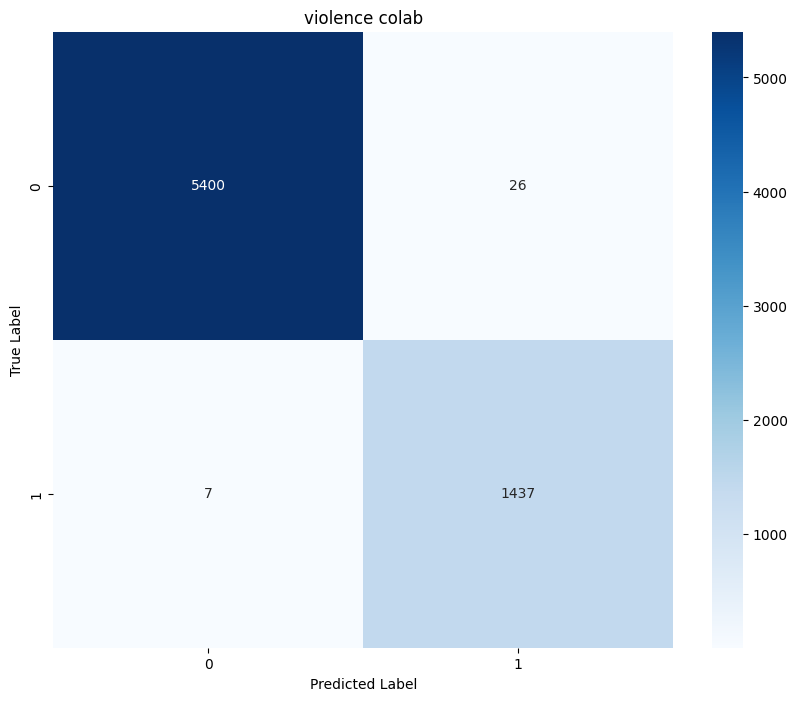

F1 Score: 0.9952079918173616

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5426
         1.0       0.98      1.00      0.99      1444

    accuracy                           1.00      6870
   macro avg       0.99      1.00      0.99      6870
weighted avg       1.00      1.00      1.00      6870



In [219]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 실제 레이블과 예측 레이블을 사용하여 Confusion Matrix를 계산합니다.
conf_matrix = confusion_matrix(y_val, test_pred_idx)

# F1 Score를 계산합니다.
f1 = f1_score(y_val, test_pred_idx, average='weighted')

# Confusion Matrix를 시각화합니다.
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('violence colab')
plt.show()

# 결과를 출력합니다.
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_val, test_pred_idx))
